# 5-1 Dataset

All the data could be read into memory for training to maximize the efficiency, if the volume of training data is small (e.g. < 1 GB)

However, if the data volume is huge (e.g. > 10 GB) which is not possible to load everything into the memory, they should be devided into batches before reading.

The API `tf.data` constructs input data pipeline to help manage huge volume of data with various formats and conversions.

### 1. Constructing Data Pipeline


Data pipeline could be constructed through following methods: numpy array, pandas DataFrame, Python generator, csv file, text file, file path, tfrecords file.

Among these methods, the most popular ones are: numpy array, pandas DataFrame and file path.

The drawback of using tfrecords file to construct data pipelines is its complication, since it requires: (a) construct `tf.Example` from samples; (b) compress `tf.Example` into string and write it to tfrecords file; (c) when using these data, the tfrecords file have to be read and analyzed into `tf.Example`.

On the other hand, the advantage of using tfrecords files is its small volume after compression, its convenient sharing through the Internet, and the fast speed of loading.



**1.1 Constructing Data Pipeline through Numpy Array**


In [1]:
# Constructing Data Pipeline through Numpy Array

import tensorflow as tf
import numpy as np 
from sklearn import datasets 
iris = datasets.load_iris()


ds1 = tf.data.Dataset.from_tensor_slices((iris["data"],iris["target"]))
for features,label in ds1.take(5):
    print(features,label)


tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


**1.2 Constructing Data Pipeline through Pandas DataFrame**

In [2]:
# Constructing Data Pipeline through Pandas DataFrame
import tensorflow as tf
from sklearn import datasets 
import pandas as pd
iris = datasets.load_iris()
dfiris = pd.DataFrame(iris["data"],columns = iris.feature_names)
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.to_dict("list"),iris["target"]))

for features,label in ds2.take(3):
    print(features,label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)


**1.3 Constructing Data Pipeline through Python generator**

In [5]:
# Constructing Data Pipeline through Python generator
import tensorflow as tf
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining a generator to read image from a folder
image_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
                    "./data/cifar2/test/",
                    target_size=(32, 32),
                    batch_size=20,
                    class_mode='binary')

classdict = image_generator.class_indices
print(classdict)

def generator():
    for features,label in image_generator:
        yield (features,label)

ds3 = tf.data.Dataset.from_generator(generator,output_types=(tf.float32,tf.int32))

Found 2000 images belonging to 2 classes.
{'airplane': 0, 'automobile': 1}


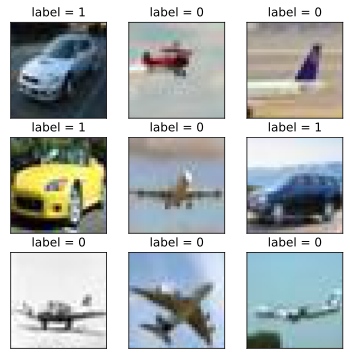

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

![](./data/5-1-cifar2预览.jpg)

![](../data/5-1-cifar2预览.jpg)

![](./data/5-1-cifar2预览.jpg)

**1.4 Constructing Data Pipeline through csv file**

In [11]:
# Constructing Data Pipeline through csv file
ds4 = tf.data.experimental.make_csv_dataset(
      file_pattern = ["./data/titanic/train.csv","./data/titanic/test.csv"],
      batch_size=3, 
      label_name="Survived",
      na_value="",
      num_epochs=1,
      ignore_errors=True)

for data,label in ds4.take(2):
    print(data,label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([686, 646, 389], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 1, 3], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Laroche, Mr. Joseph Philippe Lemercier',
       b'Harper, Mr. Henry Sleeper', b'Sadlier, Mr. Matthew'],
      dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'male', b'male', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([25., 48.,  0.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 1, 0], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 0, 0], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'SC/Paris 2123', b'PC 17572', b'367655'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([41.5792, 76.7292,  7.7292], dtype=float32)>), ('Cabin', <tf

**1.5 Constructing Data Pipeline through text file**

In [12]:
# Constructing Data Pipeline through text file

ds5 = tf.data.TextLineDataset(
    filenames = ["./data/titanic/train.csv","./data/titanic/test.csv"]
    ).skip(1) # Omitting the header on the first line

for line in ds5.take(5):
    print(line)


tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


**1.6 Constructing Data Pipeline through file path**

In [14]:
ds6 = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg")
for file in ds6.take(5):
    print(file)

tf.Tensor(b'./data/cifar2/train/airplane/855.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/2019.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/automobile/2598.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/1723.jpg', shape=(), dtype=string)
tf.Tensor(b'./data/cifar2/train/airplane/2830.jpg', shape=(), dtype=string)


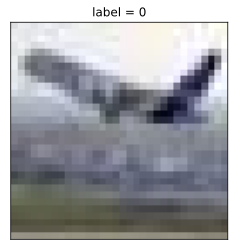

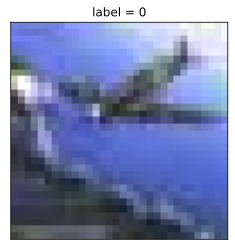

In [15]:
from matplotlib import pyplot as plt 
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) # Note that we are using jpeg format
    img = tf.image.resize(img,size)
    return(img,label)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for i,(img,label) in enumerate(ds6.map(load_image).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title("label = %d"%label)
    plt.xticks([])
    plt.yticks([])

**1.7 Constructing Data Pipeline through tfrecords file**

In [16]:
import os
import numpy as np

# inpath is the original data path; outpath: output path of the TFRecord file
def create_tfrecords(inpath,outpath): 
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath +"/"+ name+"/"
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            #img = tf.image.decode_image(img)
            #img = tf.image.encode_jpeg(img) # Use jpeg format for all the compressions
            example = tf.train.Example(
               features=tf.train.Features(feature={
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
               }))
            writer.write(example.SerializeToString())
    writer.close()
    
create_tfrecords("./data/cifar2/test/","./data/cifar2_test.tfrecords/")

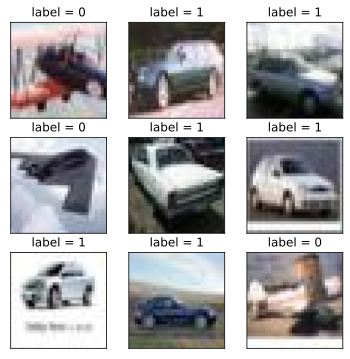

In [18]:
from matplotlib import pyplot as plt 

def parse_example(proto):
    description ={ 'img_raw' : tf.io.FixedLenFeature([], tf.string),
                   'label': tf.io.FixedLenFeature([], tf.int64)} 
    example = tf.io.parse_single_example(proto, description)
    img = tf.image.decode_jpeg(example["img_raw"])   # Note that we are using jpeg format
    img = tf.image.resize(img, (32,32))
    label = example["label"]
    return(img,label)

ds7 = tf.data.TFRecordDataset("./data/cifar2_test.tfrecords").map(parse_example).shuffle(3000)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds7.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow((img/255.0).numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

### 2. Applying Data Conversion


Dataset is very flexible in the application of data structure. Essentially it is a sequence with elements in various data types, such as tensor, list, dictionary and Dataset.

Dataset contains many functions of data conversion.

* `map`: projecting the conversion function to every element in the dataset.

* `flat_map`: projecting the conversion function to every element in the dataset, and flatten the embedded Dataset.

* `interleave`: similar as `flat_map` but interleaves the data from different sources.

* `filter`: filter certain elements.

* `zip`: zipping two Datasets with the same length.

* `concatenate`: concatenating two Datasets.

* `reduce`: executing operation of reducing.

* `batch`: constructing batches and release one batch each time; there will be one more rank comparing to the original data; the inverse operation is `unbatch`.

* `padded_batch`: constructing batches, similar as `batch`, but can achieve padded shape.

* `window`: constructing sliding window, and return Dataset of Dataset.

* `shuffle`: shuffling the order of the data.

* `repeat`: repeat the data certain times; if no argument is specified, repeat data with infinitive times.

* `shard`: sampling the elements starting from a certain position with fixed distance.

* `take`: sampling the first few elements from a certain position.

In [19]:
#map: projecting the conversion function to every element in the dataset.

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])
ds_map = ds.map(lambda x:tf.strings.split(x," "))
for x in ds_map:
    print(x)

tf.Tensor([b'hello' b'world'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'China'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'Beijing'], shape=(2,), dtype=string)


In [20]:
#flat_map: projecting the conversion function to every element in the dataset, and flatten the embedded Dataset.

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])
ds_flatmap = ds.flat_map(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_flatmap:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [21]:
# interleave: similar as `flat_map` but interleaves the data from different sources.

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])
ds_interleave = ds.interleave(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_interleave:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [23]:
#filter: filter certain elements.

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])
# Find the element with letter'a' or 'B'
ds_filter = ds.filter(lambda x: tf.strings.regex_full_match(x, ".*[a|B].*"))
for x in ds_filter:
    print(x)

tf.Tensor(b'hello China', shape=(), dtype=string)
tf.Tensor(b'hello Beijing', shape=(), dtype=string)


In [24]:
#zip: zipping two Datasets with the same length.

ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)
ds_zip = tf.data.Dataset.zip((ds1,ds2,ds3))
for x,y,z in ds_zip:
    print(x.numpy(),y.numpy(),z.numpy())


0 3 6
1 4 7
2 5 8


In [25]:
#condatenate: concatenating two Datasets.

ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds_concat = tf.data.Dataset.concatenate(ds1,ds2)
for x in ds_concat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)


In [26]:
#reduce: executing operation of reducing.

ds = tf.data.Dataset.from_tensor_slices([1,2,3,4,5.0])
result = ds.reduce(0.0,lambda x,y:tf.add(x,y))
result

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [27]:
#batch: constructing batches and release one batch each time; there will be one more rank comparing to the original data; the inverse operation is `unbatch`.

ds = tf.data.Dataset.range(12)
ds_batch = ds.batch(4)
for x in ds_batch:
    print(x)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)


In [28]:
#padded_batch: constructing batches, similar as `batch`, but can achieve padded shape.

elements = [[1, 2],[3, 4, 5],[6, 7],[8]]
ds = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32)

ds_padded_batch = ds.padded_batch(2,padded_shapes = [4,])
for x in ds_padded_batch:
    print(x)    

tf.Tensor(
[[1 2 0 0]
 [3 4 5 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[6 7 0 0]
 [8 0 0 0]], shape=(2, 4), dtype=int32)


In [29]:
#window: constructing sliding window, and return Dataset of Dataset.

ds = tf.data.Dataset.range(12)
# window returns Dataset of Dataset, which could be flattened by flat_map
ds_window = ds.window(3, shift=1).flat_map(lambda x: x.batch(3,drop_remainder=True)) 
for x in ds_window:
    print(x)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([4 5 6], shape=(3,), dtype=int64)
tf.Tensor([5 6 7], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)
tf.Tensor([7 8 9], shape=(3,), dtype=int64)
tf.Tensor([ 8  9 10], shape=(3,), dtype=int64)
tf.Tensor([ 9 10 11], shape=(3,), dtype=int64)


In [30]:
#shuffle: shuffling the order of the data.

ds = tf.data.Dataset.range(12)
ds_shuffle = ds.shuffle(buffer_size = 5)
for x in ds_shuffle:
    print(x)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)


In [31]:
#repeat: repeat the data certain times; if no argument is specified, repeat data with infinitive times.

ds = tf.data.Dataset.range(3)
ds_repeat = ds.repeat(3)
for x in ds_repeat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


In [32]:
#shard: sampling the elements starting from a certain position with fixed distance.

ds = tf.data.Dataset.range(12)
ds_shard = ds.shard(3,index = 1)

for x in ds_shard:
    print(x)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)


In [33]:
#take: sampling the first few elements from a certain position.

ds = tf.data.Dataset.range(12)
ds_take = ds.take(3)

list(ds_take.as_numpy_iterator())

[0, 1, 2]

### 3. Enhance the Efficiency of the Pipeline


The training of deep learning model could be lengthy.

The consumed time is mainly consists of two parts: **data preparation** and **parameter iteration**.

The efficiency of parameter iteration is ususlly enhanced by GPU.

The efficiency of data preparation could be improved by constructing high-efficiency data pipeline.

Below are several suggestions of constructing high-efficiency data pipeline:

* 1, Paralleling the data preparation and the parameter iteration using method `prefetch`.

* 2, Use the method `interleave` to read data with multi-process and interleave the data from different sources.

* 3, Set `num_parallel_calls` during using `map`, allowing data conversion with multiple process.

* 4, Apply method `cache` to cache data into the memory after the first epoch for the case with a small data volume.

* 5, When converting with `map`, batch the data first, and then convert each batch with vecterization.


**3.1 Paralleling the data preparation and the parameter iteration using method `prefetch`.**


In [34]:
import tensorflow as tf

# Time stamp
@tf.function
def printbar():
    ts = tf.timestamp()
    today_ts = ts%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8,end = "")
    tf.print(timestring)
    

In [35]:
import time

# Data preparation and parameter iteration is serial as default.

# Simulation of data preparation
def generator():
    for i in range(10):
        # Suppose we need 2 seconds for each preparation
        time.sleep(2) 
        yield i 
ds = tf.data.Dataset.from_generator(generator,output_types = (tf.int32))

# Simulation of parameter iteration
def train_step():
    # Suppose we need 1 seconds for each training step
    time.sleep(1) 

In [37]:
# Estimated time of training: 10*2+10*1 = 30s
printbar()
tf.print(tf.constant("start training..."))
for x in ds:
    train_step()  
printbar()
tf.print(tf.constant("end training..."))


================================================================================18:56:48
start training...
================================================================================18:57:18
end training...


In [38]:
# Use method prefetch to parallel the processes of data preparation and parameter iteration.

# Estimated time of training:  max(10*2,10*1) = 20s
printbar()
tf.print(tf.constant("start training with prefetch..."))

# tf.data.experimental.AUTOTUNE allows auto-selection of parameters
for x in ds.prefetch(buffer_size = tf.data.experimental.AUTOTUNE):
    train_step()  
    
printbar()
tf.print(tf.constant("end training..."))


================================================================================18:57:18
start training with prefetch...
================================================================================18:57:39
end training...


**3.2 Use the method `interleave` to read data with multi-process and interleave the data from different sources.**


In [40]:
ds_files = tf.data.Dataset.list_files("./data/titanic/*.csv")
ds = ds_files.flat_map(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(4):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)


In [41]:
ds_files = tf.data.Dataset.list_files("./data/titanic/*.csv")
ds = ds_files.interleave(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(8):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C', shape=(), dtype=string)


**3.3 Set `num_parallel_calls` during using `map`, allowing data conversion with multiple process.**

In [42]:
ds = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg")
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #Note: jpeg format here
    img = tf.image.resize(img,size)
    return(img,label)

In [43]:
# Conversion with single process
printbar()
tf.print(tf.constant("start transformation..."))

ds_map = ds.map(load_image)
for _ in ds_map:
    pass

printbar()
tf.print(tf.constant("end transformation..."))

================================================================================18:58:24
start transformation...
================================================================================18:58:32
end transformation...


In [44]:
# Conversion with multi-process
printbar()
tf.print(tf.constant("start parallel transformation..."))

ds_map_parallel = ds.map(load_image,num_parallel_calls = tf.data.experimental.AUTOTUNE)
for _ in ds_map_parallel:
    pass

printbar()
tf.print(tf.constant("end parallel transformation..."))

================================================================================18:58:34
start parallel transformation...
================================================================================18:58:36
end parallel transformation...


**3.4 Apply method `cache` to cache data into the memory after the first epoch for the case with a small data volume.**


In [45]:
import time

# Simulation of data preparation
def generator():
    for i in range(5):
        # Suppose we need 2 seconds for each preparation
        time.sleep(2) 
        yield i 
ds = tf.data.Dataset.from_generator(generator,output_types = (tf.int32))

# Simulation of parameter iteration模拟参数迭代
def train_step():
    # Suppose we need 1 second for each training step
    pass

# Estimated time for training: (5*2+5*0)*3 = 30s
printbar()
tf.print(tf.constant("start training..."))
for epoch in tf.range(3):
    for x in ds:
        train_step()  
    printbar()
    tf.print("epoch =",epoch," ended")
printbar()
tf.print(tf.constant("end training..."))


================================================================================18:59:03
start training...
================================================================================18:59:14
epoch = 0  ended
================================================================================18:59:24
epoch = 1  ended
================================================================================18:59:34
epoch = 2  ended
================================================================================18:59:34
end training...


In [46]:
import time

# Simulation of data preparation
def generator():
    for i in range(5):
        # Suppose we need 2 seconds for each preparation
        time.sleep(2) 
        yield i 

# Use the method "cache" to cache the data into the memory, only for dataset with small volume.
ds = tf.data.Dataset.from_generator(generator,output_types = (tf.int32)).cache()

# Simulation of parameter iteration
def train_step():
    # Suppose each training step needs 0 second
    time.sleep(0) 

# Estimated time for training: (5*2+5*0)+(5*0+5*0)*2 = 10s
printbar()
tf.print(tf.constant("start training..."))
for epoch in tf.range(3):
    for x in ds:
        train_step()  
    printbar()
    tf.print("epoch =",epoch," ended")
printbar()
tf.print(tf.constant("end training..."))

================================================================================18:59:34
start training...
================================================================================18:59:44
epoch = 0  ended
================================================================================18:59:44
epoch = 1  ended
================================================================================18:59:44
epoch = 2  ended
================================================================================18:59:44
end training...


**3.5 When converting with `map`, batch the data first, and then convert each batch with vecterization.**


In [47]:
# Map first, then batch
ds = tf.data.Dataset.range(100000)
ds_map_batch = ds.map(lambda x:x**2).batch(20)

printbar()
tf.print(tf.constant("start scalar transformation..."))
for x in ds_map_batch:
    pass
printbar()
tf.print(tf.constant("end scalar transformation..."))

================================================================================18:59:44
start scalar transformation...
================================================================================18:59:48
end scalar transformation...


In [48]:
# Batch first, then map
ds = tf.data.Dataset.range(100000)
ds_batch_map = ds.batch(20).map(lambda x:x**2)

printbar()
tf.print(tf.constant("start vector transformation..."))
for x in ds_batch_map:
    pass
printbar()
tf.print(tf.constant("end vector transformation..."))


================================================================================18:59:51
start vector transformation...
================================================================================18:59:51
end vector transformation...
